In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d

In [2]:
archs4_full = pd.read_pickle("../data/archs4_full_19036_row_log_normalized.pkl")
archs4_brca = pd.read_pickle("../data/archs4_brca_19036_row_log_norm.pkl")

tcga_brca_train = pd.read_pickle("../data/tcga_brca_raw_19036_row_log_norm_train.pkl")
tcga_brca_test = pd.read_pickle("../data/tcga_brca_raw_19036_row_log_norm_test.pkl")
tcga_no_brca = pd.read_pickle("../data/tcga_raw_no_labelled_brca_log_row_normalized.pkl")

archs4_brca_cell = pd.read_pickle("../data/archs4_cell_lines_19036_row_log_norm.pkl")
archs4_brca_tissue = pd.read_pickle("../data/archs4_brca_tissue_cell_row_log_normalized.pkl")

## concat tcga_brca data

In [3]:
tcga_brca_train.drop(["tcga_id", "Ciriello_subtype", "sample_id", "cancer_type"], axis=1, inplace=True)
tcga_brca_test.drop(["tcga_id", "subtype", "sample_id", "cancer_type"], axis=1, inplace=True)
tcga_brca_all = pd.concat([tcga_brca_train, tcga_brca_test], axis=0)
tcga_all = pd.concat([tcga_no_brca, tcga_brca_train, tcga_brca_test], axis=0)

## PCA between archs4_all and tcga_all

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
archs4_full_comp = pca.fit_transform(archs4_full)
tcga_full_comp = pca.fit_transform(tcga_all)

In [5]:
archs4_comp_df = pd.DataFrame(archs4_full_comp, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
tcga_comp_df = pd.DataFrame(tcga_full_comp, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

/home/cristovao/anaconda3/envs/thesis/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


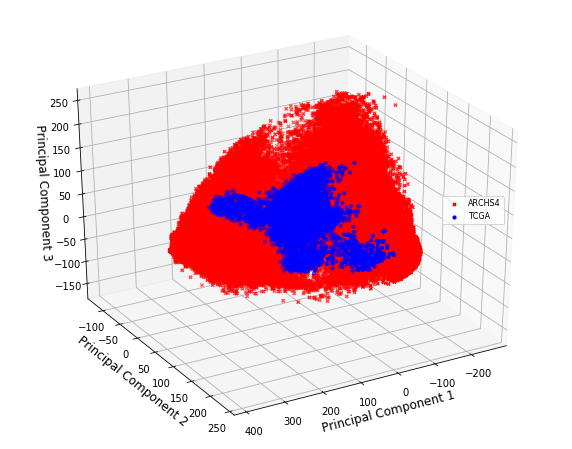

In [6]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 12, fontname='Times New Roman')
ax.set_ylabel('Principal Component 2', fontsize = 12, fontname='Times New Roman')
ax.set_zlabel('Principal Component 3', fontsize = 12, fontname='Times New Roman')
#ax.set_title('2 component PCA', fontsize = 20, fontname='Times New Roman')

archs4_plot = ax.scatter(archs4_comp_df['principal component 1'] , archs4_comp_df['principal component 2'], archs4_comp_df['principal component 3'], marker="x", c = 'red', s = 10, rasterized=True)
tcga_plot = ax.scatter(tcga_comp_df['principal component 1'] , tcga_comp_df['principal component 2'], tcga_comp_df['principal component 3'], marker="o", c = 'blue', s = 10, rasterized=True)

ax.legend((archs4_plot, tcga_plot),
           ('ARCHS4', 'TCGA'),
           scatterpoints=1,
           loc=(0.78,0.5),
           ncol=1,
           fontsize=8)
ax.grid()

ax.view_init(30, 60)

## PCA between archs4_brca and tcga_brca

In [8]:
pca = PCA(n_components=3)

archs4_brca_tissue_comp = pca.fit_transform(archs4_brca_tissue)
archs4_brca_cell_comp = pca.fit_transform(archs4_brca_cell)
tcga_brca_comp = pca.fit_transform(tcga_brca_all)

In [9]:
archs4_brca_tissue_comp_df = pd.DataFrame(archs4_brca_tissue_comp, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
archs4_brca_cell_comp_df = pd.DataFrame(archs4_brca_cell_comp, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
tcga_brca_comp_df = pd.DataFrame(tcga_brca_comp, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

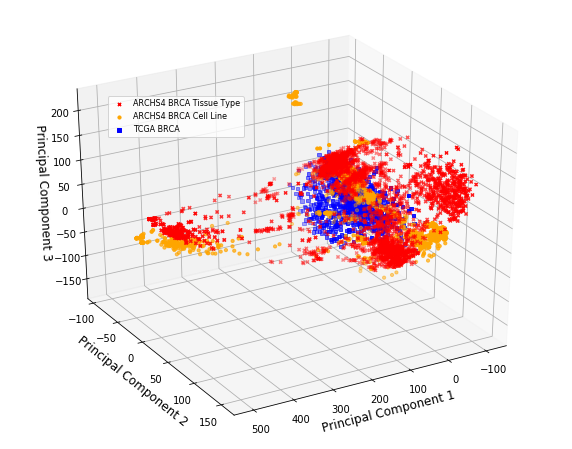

In [14]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 12, fontname='Times New Roman')
ax.set_ylabel('Principal Component 2', fontsize = 12, fontname='Times New Roman')
ax.set_zlabel('Principal Component 3', fontsize = 12, fontname='Times New Roman')
#ax.set_title('2 component PCA', fontsize = 20, fontname='Times New Roman')

brca_tissue = ax.scatter(archs4_brca_tissue_comp_df['principal component 1'] , archs4_brca_tissue_comp_df['principal component 2'], archs4_brca_tissue_comp_df['principal component 3'], c = 'red', marker="x", s = 10)
brca_cell_line = ax.scatter(archs4_brca_cell_comp_df['principal component 1'] , archs4_brca_cell_comp_df['principal component 2'], archs4_brca_cell_comp_df['principal component 3'], c = 'orange', marker="o", s = 10)
tcga_brca = ax.scatter(tcga_brca_comp_df['principal component 1'] , tcga_brca_comp_df['principal component 2'], tcga_brca_comp_df['principal component 3'], c = 'blue', marker="s", s = 10)
ax.legend((brca_tissue, brca_cell_line, tcga_brca),
           ('ARCHS4 BRCA Tissue Type', 'ARCHS4 BRCA Cell Line', 'TCGA BRCA'),
           scatterpoints=1,
           loc=(0.18,0.7),
           ncol=1,
           fontsize=8)
ax.grid()

ax.view_init(30, 60)

## Generate the 2D ones

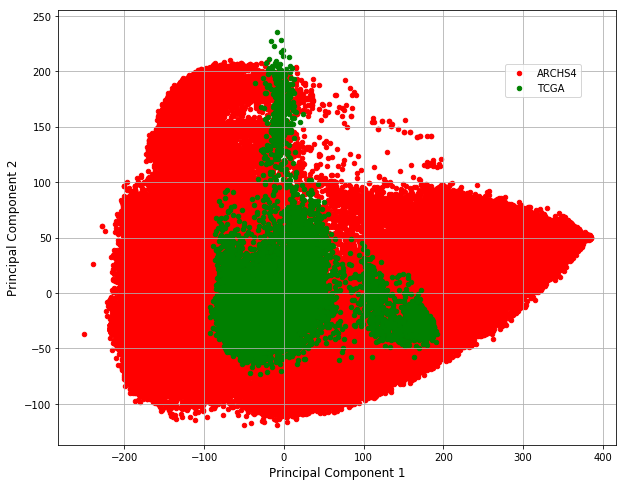

In [115]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
ax.set_xlabel('Principal Component 1', fontsize = 12, fontname='Times New Roman')
ax.set_ylabel('Principal Component 2', fontsize = 12, fontname='Times New Roman')
#ax.set_title('2 component PCA', fontsize = 20, fontname='Times New Roman')

archs4_plot = ax.scatter(archs4_comp_df['principal component 1'] , archs4_comp_df['principal component 2'], c = 'red', s = 20, rasterized=True)
tcga_plot = ax.scatter(tcga_comp_df['principal component 1'] , tcga_comp_df['principal component 2'], c = 'green', s = 20, rasterized=True)

ax.legend((archs4_plot, tcga_plot),
           ('ARCHS4', 'TCGA'),
           scatterpoints=1,
           loc=(0.8,0.8),
           ncol=1,
           fontsize=10)
ax.grid()


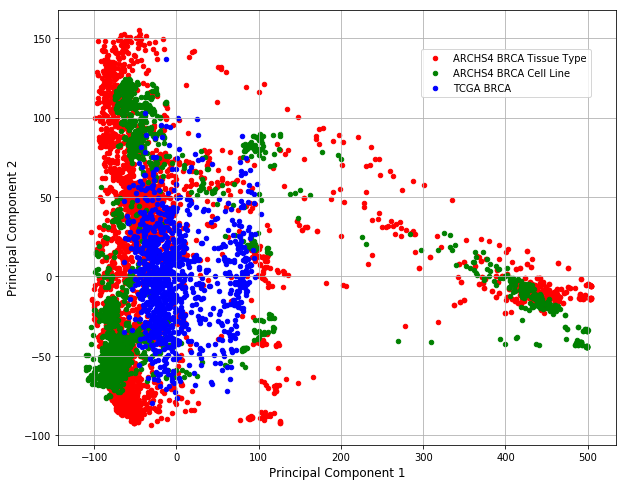

In [119]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
ax.set_xlabel('Principal Component 1', fontsize = 12, fontname='Times New Roman')
ax.set_ylabel('Principal Component 2', fontsize = 12, fontname='Times New Roman')
#ax.set_title('2 component PCA', fontsize = 20, fontname='Times New Roman')

brca_tissue = ax.scatter(archs4_brca_tissue_comp_df['principal component 1'] , archs4_brca_tissue_comp_df['principal component 2'], c = 'red', s = 20)
brca_cell_line = ax.scatter(archs4_brca_cell_comp_df['principal component 1'] , archs4_brca_cell_comp_df['principal component 2'],c = 'green', s = 20)
tcga_brca = ax.scatter(tcga_brca_comp_df['principal component 1'] , tcga_brca_comp_df['principal component 2'], c = 'blue', s = 20)
ax.legend((brca_tissue, brca_cell_line, tcga_brca),
           ('ARCHS4 BRCA Tissue Type', 'ARCHS4 BRCA Cell Line', 'TCGA BRCA'),
           scatterpoints=1,
           loc=(0.65,0.8),
           ncol=1,
           fontsize=10)
ax.grid()

In [15]:
fig.savefig("../figures/brca_3D_new_colors.pdf", bbox_inches='tight')